# 1. Introduction

The purpose of this notebook is to create a simple Convolutionnal Neural Network using Tensorflow in order to recognize hand gestures for sign language. We shall then try to use it with the camera using OpenCV.

## 1.1. Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Input
import cv2
import matplotlib.pyplot as plt
import random as rd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Corrected path to include 'Desktop' instead of 'ktop'
for dirname, _, filenames in os.walk('C:/Users/Ananymis/Desktop/mostafa/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


C:/Users/Ananymis/Desktop/mostafa/input\american_sign_language.PNG
C:/Users/Ananymis/Desktop/mostafa/input\amer_sign2.png
C:/Users/Ananymis/Desktop/mostafa/input\amer_sign3.png
C:/Users/Ananymis/Desktop/mostafa/input\sign_mnist_test.csv
C:/Users/Ananymis/Desktop/mostafa/input\sign_mnist_train.csv
C:/Users/Ananymis/Desktop/mostafa/input\sign_mnist_test\sign_mnist_test.csv
C:/Users/Ananymis/Desktop/mostafa/input\sign_mnist_train\sign_mnist_train.csv


## 1.2. Dataset

We import the train dataset and show a random image and its label. 

In [9]:
import pandas as pd

# Assuming the corrected path is accurate and the file exists
df_train = pd.read_csv("C:/Users/Ananymis/Desktop/mostafa/input/sign_mnist_test/sign_mnist_test.csv")

# Display the first few rows of the dataframe to verify successful loading
print(df_train.head())


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       12

C:\Users\Ananymis\AppData\Local\Temp\ipykernel_2396\3722236411.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(alphabet[df_train.loc[n][0]])


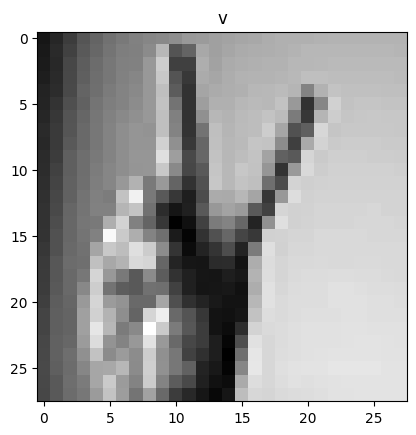

In [10]:
alphabet=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
n = rd.randrange(df_train.shape[0])
ar = np.array(df_train.loc[n][1:]).reshape((28,28))
plt.imshow(ar, cmap='gray')
plt.title(alphabet[df_train.loc[n][0]])
plt.show()

# 2. Data Preprocessing

First we separate our labels from our data. We then have to normalize the data of all images, and create a simple one hot encoding of the labels.

In [11]:
y = df_train["label"]
X = df_train.drop(['label'], axis=1)

X = np.array(X)/255
y = np.array(y)

Y = np.zeros((len(alphabet),df_train.shape[0]))
for i in range(len(y)):
  Y[y[i],i] = 1
X = X.reshape((-1, 28,28,1))
Y = Y.reshape((26,-1))

# 3. Convolutionnal Neural Network

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1),padding='same'))
model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides=None,padding='same'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides=None,padding='same'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(556, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

model.summary()

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

In [13]:
history = model.fit(X,y,batch_size=64,epochs=3, validation_split=0.2) #training

Epoch 1/3
90/90 [==============================] - 16s 149ms/step - loss: 2.5037 - accuracy: 0.2723 - val_loss: 0.7537 - val_accuracy: 0.7861
Epoch 2/3
90/90 [==============================] - 14s 150ms/step - loss: 0.3690 - accuracy: 0.8855 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 3/3
90/90 [==============================] - 13s 142ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0016 - val_accuracy: 1.0000


The predictions are remarkably good ever since the first epoch.

# 4. Validation

I decided to use the test dataset as validation.

1/1 [==============================] - 0s 210ms/step


C:\Users\Ananymis\AppData\Local\Temp\ipykernel_2396\3779270704.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Prediction :  {alphabet[ np.argmax(model.predict(X[n].reshape(1,28,28,1)))]} | had to predict {alphabet[df_valid.loc[n][0]]}")


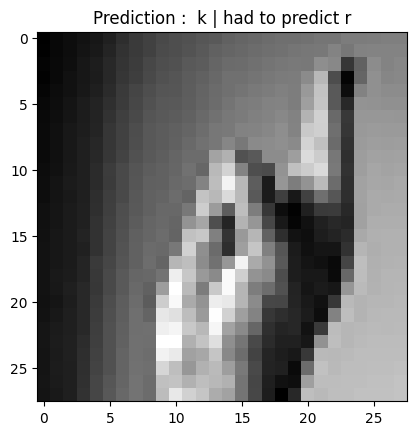

In [7]:
import pandas as pd 

df_valid = pd.read_csv("C:/Users/Ananymis/Desktop/mostafa/input/sign_mnist_train/sign_mnist_train.csv")

#preprocessing
n = rd.randrange(df_valid.shape[0])
y = df_valid["label"]
X = df_valid.drop(['label'], axis=1)

ar = np.array(df_valid.loc[n][1:]).reshape((28,28))

X = np.array(X)/255
y = np.array(y)

Y = np.zeros((26,df_valid.shape[0]))
for i in range(len(y)):
  Y[y[i],i] = 1
X = X.reshape((-1, 28,28,1))
Y = Y.reshape((26,-1))

plt.imshow(ar, cmap='gray')
plt.title(f"Prediction :  {alphabet[ np.argmax(model.predict(X[n].reshape(1,28,28,1)))]} | had to predict {alphabet[df_valid.loc[n][0]]}")
plt.show()

# 5. Using Webcam with OpenCV 

*Warning : Doesn't work online, works on user machine*

In [14]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Stop loop if there are no frames to capture

    cv2.rectangle(frame, (100, 100), (300, 300), (0, 255, 0), 2)
    roi = frame[100:300, 100:300]
    roi_resized = cv2.resize(roi, (28, 28))
    roi_gray = cv2.cvtColor(roi_resized, cv2.COLOR_BGR2GRAY)
    roi_normalized = roi_gray / 255.0  # Normalize the image

    processed_frame = roi_normalized.reshape(1, 28, 28, 1)
    try:
        prediction = model.predict(processed_frame)
        predicted_letter = alphabet[np.argmax(prediction)]
        
        # Draw the predicted letter on the video frame within the green box
        cv2.putText(frame, predicted_letter, (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    except Exception as e:
        print(f"Prediction error: {e}")

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break  # Exit the loop

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 37ms/step



import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Stop loop if there are no frames to capture

    cv2.rectangle(frame, (100, 100), (300, 300), (0, 255, 0), 0)
    roi = frame[100:300, 100:300]
    f = cv2.resize(roi, (28, 28))
    gray = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    gray_normalized = gray / 255.0  # Normalize the image

    processed_frame = gray_normalized.reshape(1, 28, 28, 1)
    prediction = model.predict(processed_frame)
    predicted_letter = alphabet[np.argmax(prediction)]
    
    # Display the predicted sign on the video feed
    cv2.putText(frame, predicted_letter, (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow('frame', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break  # Exit the loop

cap.release()
cv2.destroyAllWindows()
